File: Dodgers-Marketing_EDA.ipynb  
Name: Corinne Medeiros  
Date: 9/20/20    
Desc: Improving a Dodgers Marketing Promotion (p.1 Python)  
Usage: Program previews and summarizes Dodgers data, and also generates exploratory visualizations.

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns

## Improving a Dodgers Marketing Promotion - Exploratory Data Analysis in Python  

### Objective: Determine what night would be the best to run a marketing promotion to increase attendance.

**Data source:**  
Dodgers Major League Baseball data from 2012  
[dodgers.csv](https://corinnemedeiros.github.io/Projects/Dodgers-Marketing/dodgers.csv)

### Importing and Previewing Data

In [2]:
# Loading data into a Pandas DataFrame
dodgers_data = pd.read_csv("dodgers.csv")

In [3]:
# Checking dimensions
print(dodgers_data.shape)

(81, 12)


In [4]:
# Previewing data
dodgers_data.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [5]:
# Displaying summary information for string columns

print("String Data:\n")
print(dodgers_data.describe(include=['O']))

String Data:

       month day_of_week opponent   skies day_night cap shirt fireworks  \
count     81          81       81      81        81  81    81        81   
unique     7           7       17       2         2   2     2         2   
top      MAY      Sunday   Giants  Clear      Night  NO    NO        NO   
freq      18          13        9      62        66  79    78        67   

       bobblehead  
count          81  
unique          2  
top            NO  
freq           70  


In [6]:
# Displaying summary information for numeric columns
dodgers_data.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [7]:
# Checking missing data sums
dodgers_data.isna().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

### Exploratory Visualizations

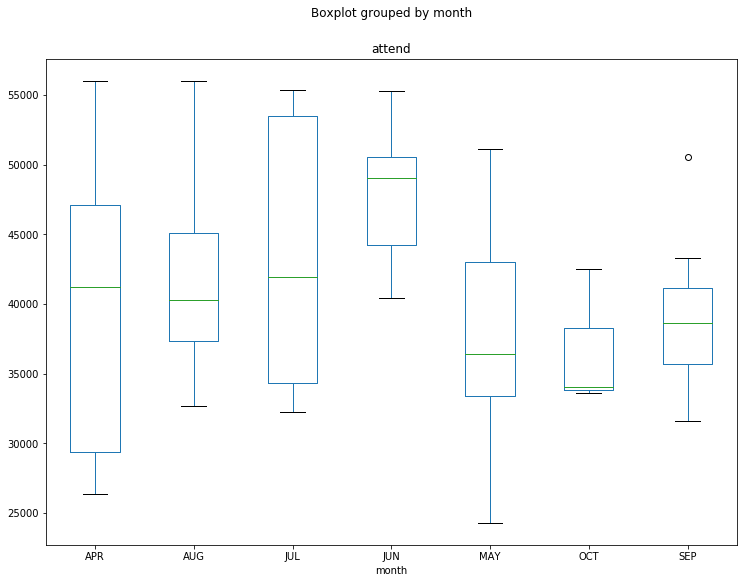

In [8]:
# Boxplot of monthly attendance

dodgers_data.boxplot(by ='month', column =['attend'], figsize=(12,9), grid = False)

The above boxplot illustrates the highest monthly median attendance being in June, with a consistently higher attendance than the rest of the months. October on the other hand has the lowest median and the most consistently lower attendance. April and July have a similar median and wide range of attendance, but overall July attendance is greater.

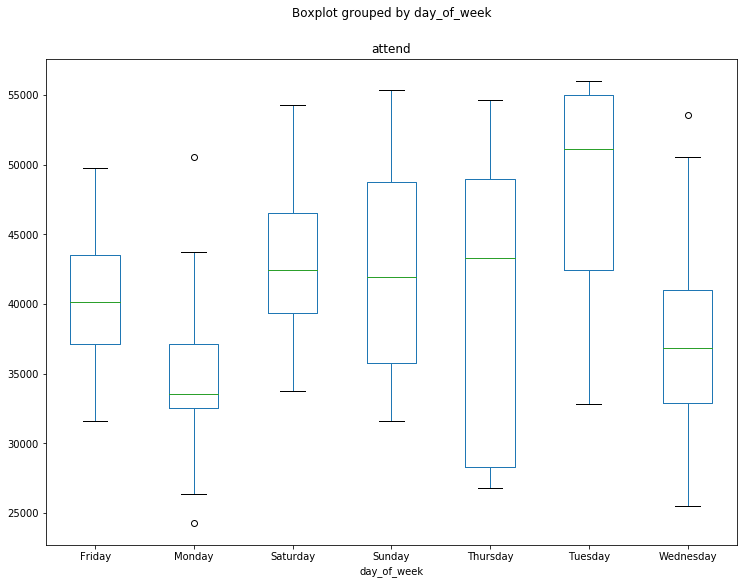

In [19]:
# Boxplot of daily attendance

dodgers_data.boxplot(by ='day_of_week', column =['attend'], figsize=(12,9), grid = False)

This boxplot shows us that the highest daily median attendance is on Tuesdays, with a consistently higher attendance than the rest of the days. Mondays have the lowest median and consistently lower attendance. At this point, now that I have an idea about monthly and daily averages, it will help to visualize what other factors could have an effect on attendance.

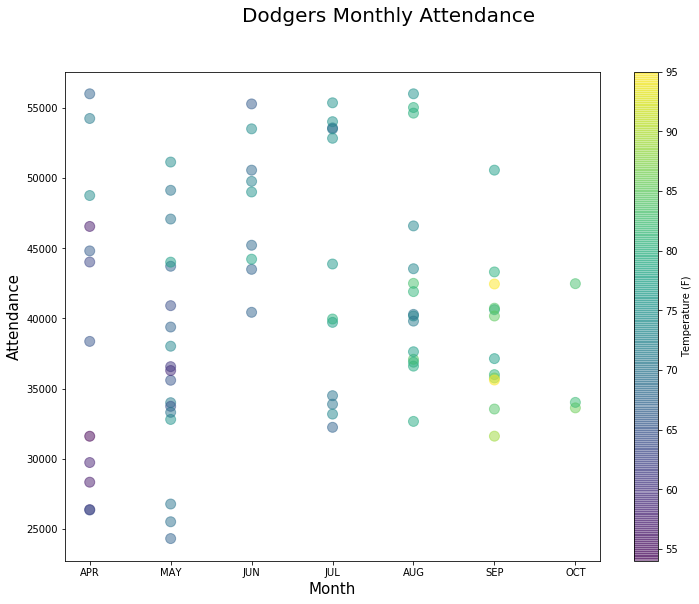

In [9]:
# Scatterplot of monthly attendance and temperature

plt.figure(figsize=(12, 9))
plt.scatter('month', 'attend', s=100, c='temp', alpha=0.5, data=dodgers_data)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Attendance', fontsize=15)
plt.suptitle('Dodgers Monthly Attendance', fontsize=20)
plt.colorbar(label='Temperature (F)')
plt.show()

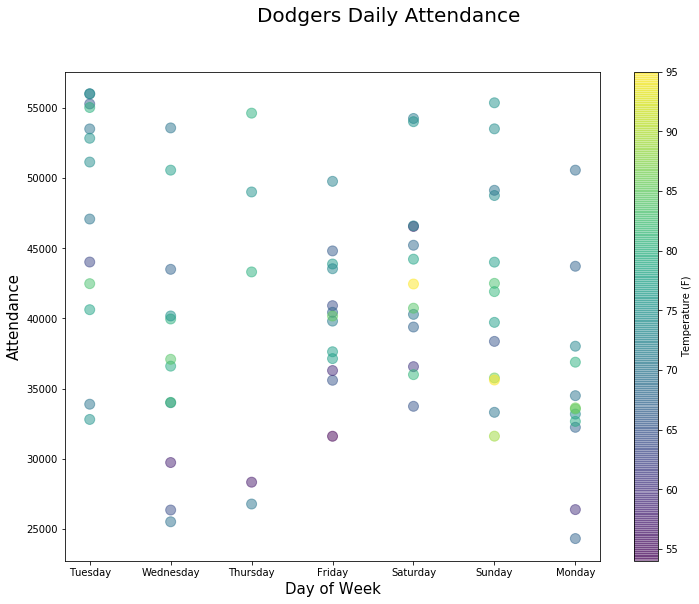

In [10]:
# Scatterplot of daily attendance and temperature

plt.figure(figsize=(12, 9))
plt.scatter('day_of_week', 'attend', s=100, c='temp', alpha=0.5, data=dodgers_data)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Attendance', fontsize=15)
plt.suptitle('Dodgers Daily Attendance', fontsize=20)
plt.colorbar(label='Temperature (F)')
plt.show()

[]

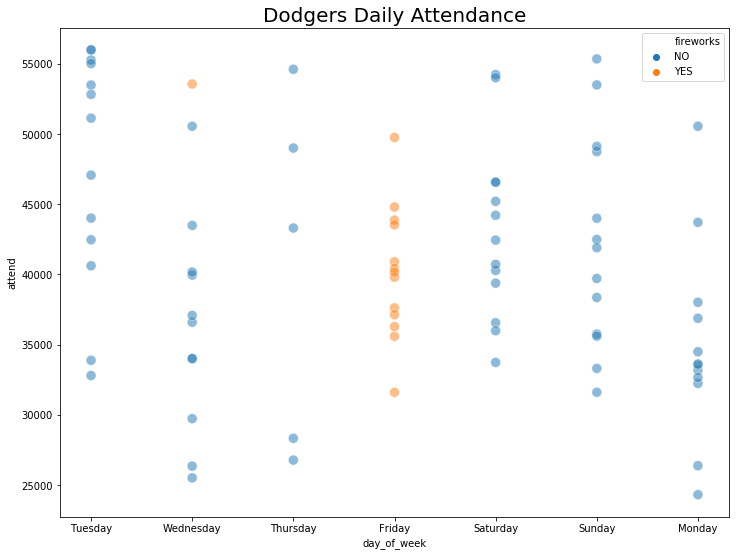

In [18]:
# Scatterplot of daily attendance and fireworks

f, ax = plt.subplots(figsize=(12, 9))

g = sns.scatterplot(x='day_of_week', y='attend', s=100, alpha=0.5,
              hue='fireworks',
              data=dodgers_data);
plt.title('Dodgers Daily Attendance', fontsize=20)
g.set()

Looking at the scatterplots of attendance by week day and month, with a few additional factors taken into consideration using colors, it looks like timing is most important. Neither temperature nor fireworks appear to have a large effect on attendance. Based on this initial exploration, I'll now switch over to RStudio to perform a few machine learning calculations in R.